In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [370]:
jjoo = pd.read_csv("athlete_events.csv")
jjoo

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [371]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Identificación y tratamiento de valores nulos

In [372]:
jjoo.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [373]:
#Para tratar los nulos de los medallas, simplement asigno No Medal ("NoM") en lugar de NaN
jjoo["Medal"] = jjoo["Medal"].fillna("NoM")

In [374]:
#Para los nulos de edad, altura y peso, sustuiremos la mediana por sexo, ya que son variables secundarias.

jjoo["Height"] = jjoo.groupby(["Sex"])['Height'].transform(lambda x: x.fillna(x.median()))
jjoo["Age"] = jjoo.groupby(["Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
jjoo["Weight"] = jjoo.groupby(["Sex"])['Weight'].transform(lambda x: x.fillna(x.median()))

In [375]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Analizando y recodificando columnas

In [376]:
#Consultando las columnas observamos que para cada NOC (Comíté Olímpico Nacional) le corresponden diferentes equipos. Vamos a analizarlos bien, para que así a cada atleta le coresponda simplemente el nombre de su país
jjoo.groupby("NOC")["Team"].nunique().sort_values(ascending=False)

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
      ... 
VNM      1
YEM      1
YAR      1
YMD      1
ZAM      1
Name: Team, Length: 230, dtype: int64

In [377]:
# Efectivamente para cada NOC le corresponden diferentes equipos. Vamos a utilizar el otro dataset de la entrada principal, que relaciona NOCs con países 

In [378]:
noc = pd.read_csv('noc_regions.csv')
noc = noc.drop("notes", axis = 1)
noc = noc.rename(columns = {"region": "Country"})

In [379]:
noc

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
...,...,...
225,YEM,Yemen
226,YMD,Yemen
227,YUG,Serbia
228,ZAM,Zambia


In [380]:
#Uno los dos datasets a través de la columna NOC para que aparezca la columna Country en nuestro dataset principal
#El join es left porque queremos todos los países participantes, tengan NOC o no asociado

jjoo_merge = jjoo.merge(noc, left_on = "NOC", right_on = "NOC", how = "left")

In [381]:
#Por consenso colectivo, nos vamos a quedar con los eventos de verano
jjoo = jjoo_merge[jjoo_merge["Season"] == "Summer"]

In [382]:
#Comprobamos si hay NOC/Equipos que no tiene país asignado
jjoo_merge.loc[jjoo_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [383]:
#Les asigno país manualmente

jjoo.loc[jjoo['NOC']=='SGP', "Country"] = "Singapore"
jjoo.loc[jjoo['NOC']=='ROT', "Country"] = "Refugee Olympic Athletes"
jjoo.loc[jjoo['NOC']=='UNK', "Country"] = "Unknown"
jjoo.loc[jjoo['NOC']=='TUV', "Country"] = "Tuvalu"

In [384]:
#Elimamos la columna de Team, para quedarnos con Country
jjoo = jjoo.drop(["Team"], axis = 1)

## Análisis exploratorio

In [385]:
#Vamos a explorar qué países tienen más medallas.
#Para simplificarnos la vida, vamos a hacer una columna que indique si el atleta tiene o medalla o no, independientemente del metal

jjoo["Has_Medal"] = "0"
jjoo.loc[jjoo["Medal"] != "NoM", "Has_Medal"] = 1

In [386]:
#Podemos comprovar que las medallas estan asignadas por atletas. Como en los medalleros se cuenta 1 medalla por deporte de equipo, primero tenemos que encontrar los deportes de equipo y asignarles solo una medalla.
jjoo.loc[(jjoo.Sport == "Handball") & (jjoo["Medal"] == "Gold") & (jjoo.Year == 2016) & (jjoo.Sex == "M")]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal
41295,21299,Mads Christiansen,M,30.0,197.0,93.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90256,45732,Henrik Toft Hansen,M,29.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90337,45782,Mikkel Hansen,M,28.0,196.0,98.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90361,45793,Ren Toft Hansen,M,31.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
107590,54379,Henrik Mllgaard Jensen,M,31.0,197.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
126854,63955,Jannick Green Krejberg,M,27.0,195.0,95.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
131775,66315,Niklas Landin Jacobsen,M,27.0,201.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
132743,66820,Mads Mensah Larsen,M,24.0,188.0,106.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
164022,82327,Casper Ulrich Mortensen,M,26.0,190.0,88.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
171165,86018,Michael Damgaard Nielsen,M,26.0,192.0,92.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1


In [387]:
#Suma medallas por evento
medal_sum = jjoo.groupby(["Country","Year","Sport","Event","Medal"], as_index = False)["Has_Medal"].sum()

#Contar solo las medallas de oro (dando por supuesto que en los eventos de equipo también habrá múltiples de otro metal)
gold_medals = medal_sum[medal_sum['Medal'] == 'Gold']

#Buscar eventos con múltiples medallas de oro (por equipo o por múltiple premio)
identify_team_events = gold_medals[gold_medals['Has_Medal'] > 1]

team_sports = identify_team_events['Event'].unique()


In [388]:
sports_single = ["Athletics Men's Pole Vault","Gymnastics Men's Horizontal Bar","Gymnastics Men's Horse Vault","Gymnastics Men's Horizontal Bar","Gymnastics Men's Pommelled Horse","Gymnastics Women's Balance Beam","Swimming Women's 100 metres Freestyle","Swimming Men's 50 metres Freestyle"]
team_sports = list(set(team_sports) - set(sports_single))

In [389]:
# Si un evento coincide con un deporte de equipo, entonces es un evento de equipo. Los otros son eventos individuales.
team_event = []
single_event = []

for event in jjoo["Event"]:
    if event is team_sports:
        team_event.append(True)
        single_event.append(False)
    else:
        team_event.append(False)
        single_event.append(True)

# Filas en que hay 1 oro
medal = jjoo['Has_Medal'] == 1

# Inicializar columnas
jjoo['Team_Event'] = 0
jjoo['Single_Event'] = 0

#Asignar 1 a eventos de equipo con medalla
jjoo.loc[team_event & medal, "Team_Event"] = 1

#Categoría final
jjoo['Event_Category'] = jjoo['Single_Event'] + jjoo['Team_Event']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20484\1339597294.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  jjoo.loc[team_event & medal, "Team_Event"] = 1


In [390]:
#Ahora contamos una medalla por evento, o sea que tenemos que dividir el número de medallas por el total de miembros del equipo ganador.
#Se filtran columnas con medalla, se agrupan columnas de interés, se agregan cuántos atletas ganaros esta medalla y max devuelve si al menos uno es evento de equipo

medals_tally = jjoo[jjoo["Has_Medal"] == 1].groupby(["Year", "Country", "Sport","Event", "Medal"]).agg(atletas=("Has_Medal","sum"),Team_Event=("Team_Event","max")).reset_index()
medals_tally['Medal_corrected'] = 1
medals_tally

,Year,Country,Sport,Event,Medal,atletas,Team_Event,Medal_corrected
0,1896,Australia,Athletics,"Athletics Men's 1,500 metres",Gold,1,0,1
1,1896,Australia,Athletics,Athletics Men's 800 metres,Gold,1,0,1
2,1896,Australia,Tennis,Tennis Men's Doubles,Bronze,1,0,1
3,1896,Austria,Cycling,"Cycling Men's 10,000 metres",Bronze,1,0,1
4,1896,Austria,Cycling,Cycling Men's 12-Hours Race,Gold,1,0,1
...,...,...,...,...,...,...,...,...
16047,2016,Venezuela,Athletics,Athletics Women's Triple Jump,Silver,1,0,1
16048,2016,Venezuela,Boxing,Boxing Men's Flyweight,Bronze,1,0,1
16049,2016,Venezuela,Cycling,Cycling Women's BMX,Bronze,1,0,1
16050,2016,Vietnam,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,1,0,1


In [391]:
#Finalmente podemos sumar las medallas por país y filtrar el top 10
medals_total = medals_tally.groupby(["Country"])["Medal_corrected"].sum()

medals_top = medals_total.sort_values(ascending=False).iloc[0:10]

In [392]:
medals_top

Country
USA          2544
Russia       1577
Germany      1389
UK            892
France        770
Italy         608
China         545
Australia     518
Sweden        513
Hungary       504
Name: Medal_corrected, dtype: int64

In [393]:
#Para graficar la evolución temporal del medallero, seleccionamos los país que nos interesan
top_countries = ["USA","Russia","Germany","UK","France","Italy","China"]

#Unstack nos permite separar los países por columnas y asignarles las medallas por año
year_country = medals_tally.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)

#Filtramos sólo los países seleciconados
year_country = year_country.loc[:, top_countries]

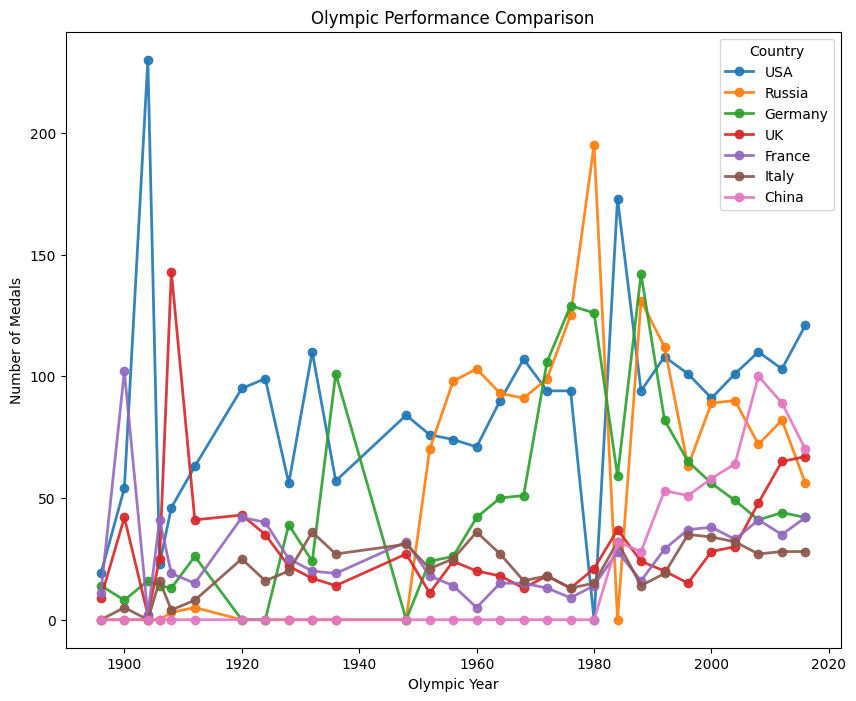

In [394]:
year_country.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison');

In [395]:
top_4 = medals_total.sort_values(ascending=False).iloc[0:4]

In [396]:
#Para graficar la evolución temporal del medallero, seleccionamos los país que nos interesan
top_4 = ["USA","Russia","Germany","China"]

#Unstack nos permite separar los países por columnas y asignarles las medallas por año
year_country4 = medals_tally.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)

#Filtramos sólo los países seleciconados
year_country4 = year_country4.loc[:, top_4]

In [397]:
top_4

['USA', 'Russia', 'Germany', 'China']

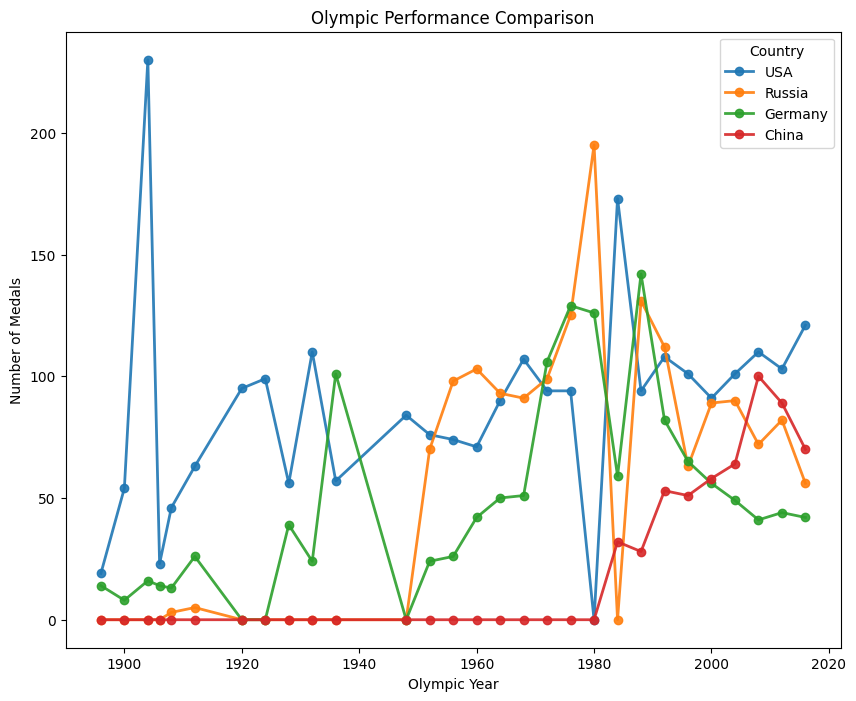

In [398]:
year_country4.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison');

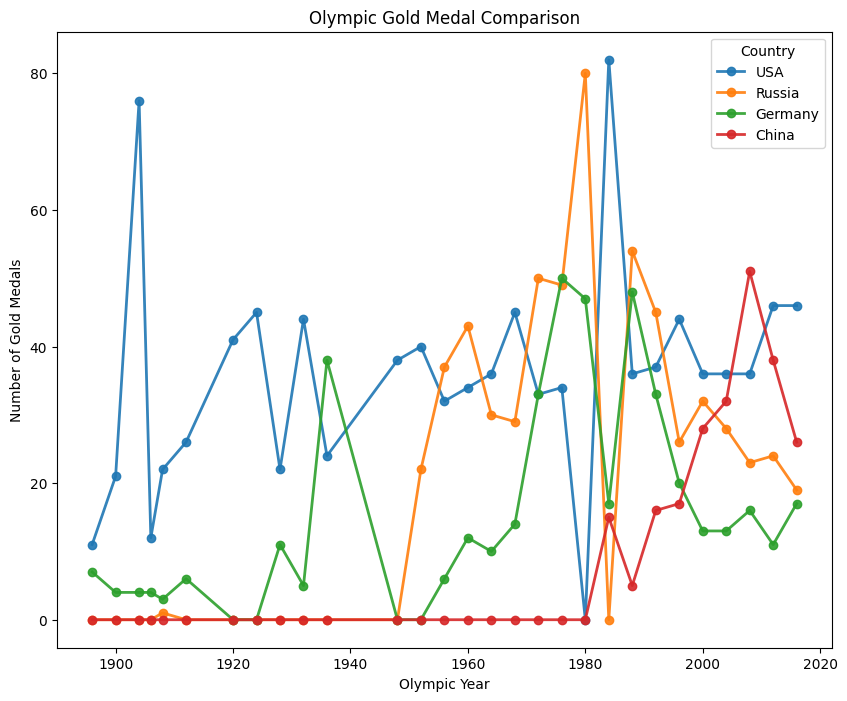

In [399]:
#La mayoría de tablas de medallas se ordenan por oros, así que repetimos el proceso para obtener la gráfica de oros.

gold_medals_total = medals_tally[medals_tally["Medal"] == "Gold"]
gold_medals_country = gold_medals_total.groupby(["Country"])["Medal_corrected"].sum()
gold_medals_top = gold_medals_country.sort_values(ascending=False).iloc[0:10]
year_country4_gold = gold_medals_total.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)
year_country4_gold = year_country4_gold.loc[:, top_4]

year_country4_gold.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Gold Medals')
plt.title('Olympic Gold Medal Comparison');

**US**
Pre WWI: inconsistent performing, few athletes than hosts
1904: largest medal haul (home advantage, expensive trip, 80% American participants, american culture events, no qualification standards)
1952: URSS debut
1980: boycott
1984: top gold medals, boycott 
1996: Atlanta, top again 6 times

**URSS**

**China**
China’s early Olympic participation was marked by limited resources, political challenges, and poor competitive results, but it played an important role in international exchange and the development of Chinese sports.

Following the founding of the People’s Republic of China in 1949, the new government adopted a positive stance toward the Olympic Movement. However, disputes over China’s representation led to exclusion from several Olympic Games between 1956 and 1979.

Following the founding of the People’s Republic of China in 1949, the new government adopted a positive stance toward the Olympic Movement. However, disputes over China’s representation led to exclusion from several Olympic Games between 1956 and 1979.

https://web.archive.org/web/20160307045545/http://en.olympic.cn/games/summer/2004-03-27/121663.html





In [400]:
medals_tally_top = medals_tally[medals_tally["Country"].isin(top_4)]
medals_by_country = medals_tally_top.groupby(["Country","Medal"])["Medal_corrected"].sum().unstack(fill_value=0)
medals_by_country = medals_by_country.loc[:, ['Gold', 'Silver', 'Bronze']]


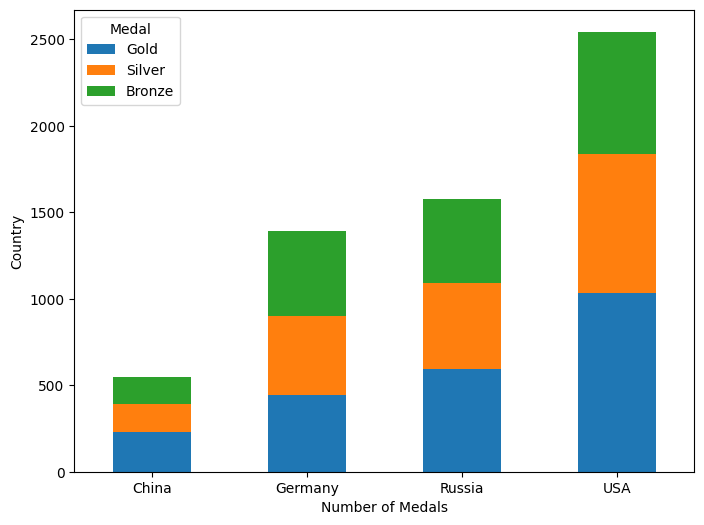

In [401]:
medals_by_country.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0)
plt.xlabel('Number of Medals')
plt.ylabel('Country');

In [402]:
best_sports_gold = medals_tally_top.groupby(["Country","Sport","Medal"])["Medal_corrected"].sum().unstack(fill_value=0).reset_index()
best_sports_gold = best_sports_gold.drop(["Bronze","Silver"], axis = 1)
best_sports_gold = best_sports_gold.sort_values(by=["Country","Gold"], ascending = [True,False])
best_sports_gold = best_sports_gold.groupby("Country").head(5)
best_sports_gold

Medal,Country,Sport,Gold
8,China,Diving,40
29,China,Weightlifting,34
24,China,Table Tennis,28
12,China,Gymnastics,26
20,China,Shooting,22
34,Germany,Athletics,72
50,Germany,Rowing,64
54,Germany,Swimming,55
37,Germany,Canoeing,52
40,Germany,Equestrianism,41


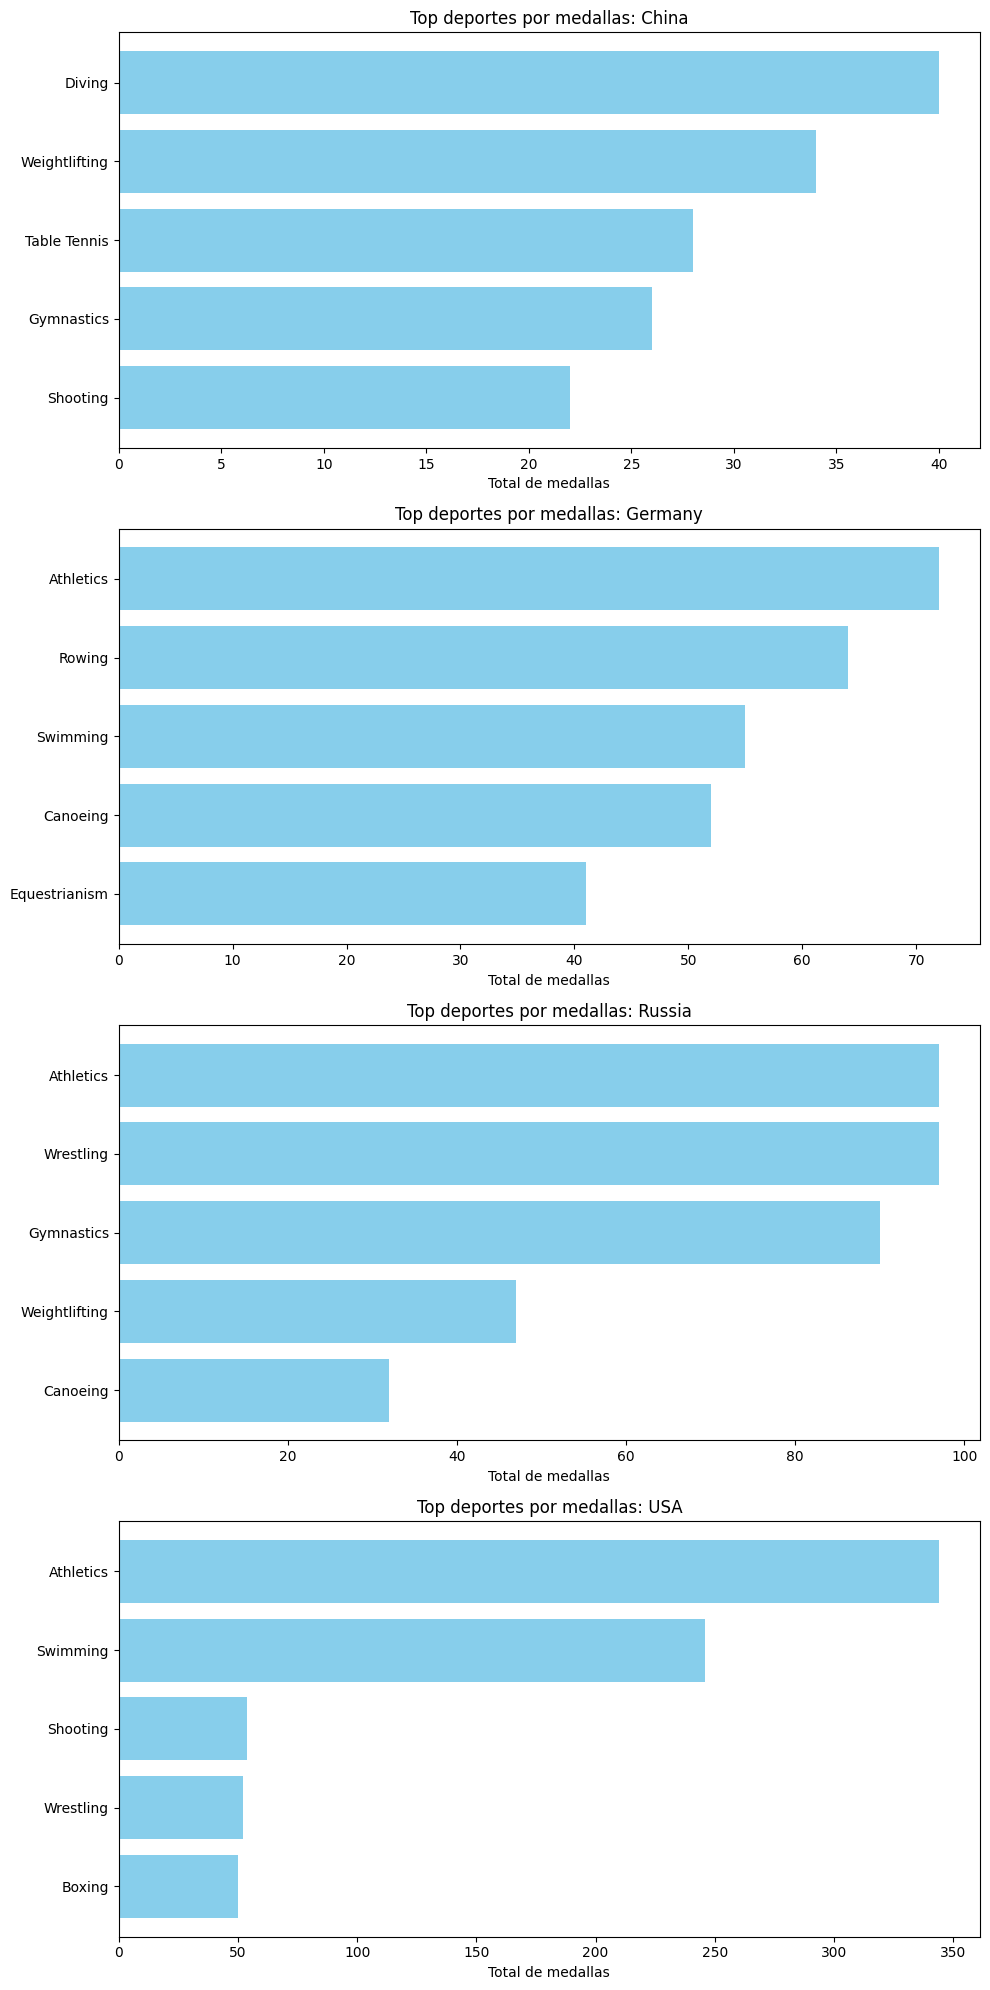

In [403]:
countries = best_sports_gold["Country"].unique()
n_countries = len(countries)

fig, axes = plt.subplots(n_countries, 1, figsize=(10, 5*n_countries))

if n_countries == 1:
    axes = [axes]

for ax, country in zip(axes, countries):
    df = best_sports_gold[best_sports_gold["Country"] == country]
    ax.barh(df["Sport"], df["Gold"], color="skyblue")
    ax.set_title(f"Top deportes por medallas: {country}")
    ax.set_xlabel("Total de medallas")
    ax.invert_yaxis()  # Para que el top esté arriba

plt.tight_layout()
plt.show()

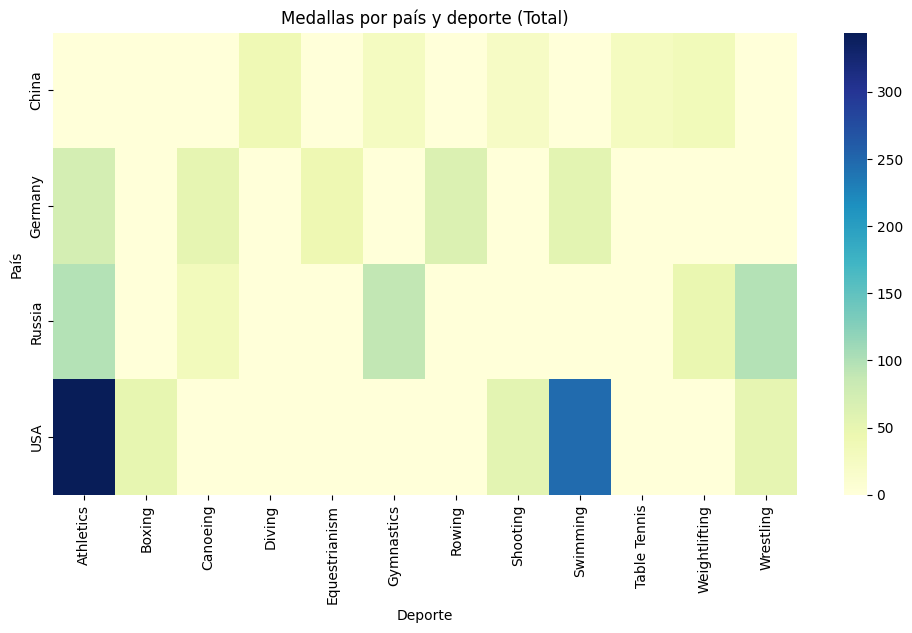

In [404]:
heatmap_data = best_sports_gold.pivot(index="Country", columns="Sport", values="Gold").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, fmt=".0f", cmap="YlGnBu")
plt.title("Medallas por país y deporte (Total)")
plt.xlabel("Deporte")
plt.ylabel("País")
plt.show()

Unas claves del éxito es la especialización en deportes diferentes, ya que cada país tiene deportes estratégicos donde se concentra sus recursos y logra la mayoría de sus medallas. China y Rusia muestran concentración en unos pocos deportes. Alemania y Rusia están más distribuidos, aunque USA tiene concentración extrema en atletismo y natación. Cada país parece enfocarse en deportes donde históricamente ha invertido recursos y programas de entrenamiento especializados. Algunos deportes aparecen como “vacíos” para ciertos países, lo que indica falta de inversión o tradición. Se puede usar para planificar inversiones futuras, analizar competencias internacionales o estudiar cómo la especialización y la cultura deportiva influyen en los resultados olímpicos.


Estados Unidos destaca por los deportes técnicos individuales de alto rendimiento, como atletismo y natación. Sobresale en deportes que requieren velocidad, resistencia y entrenamiento sistemático.
Russia tiene una gran especialización en 3 deportes, como atletismo, gimnástica y lucha libre. Fuerte en deportes que combinan fuerza y técnica; gran parte en gimnasia y deportes de combate.
Alemania también puntúa en atletismo y natación, pero destaca en deportes de forma aislada como en equitación y remo. Tiene un buen balance entre deportes de resistencia y fuerza, y tiene una buena tradición en deportes de equipo y acuáticos.
Por último, China se centra en deportes de precisión y fuerza, dominando en deportes que tradicionalmente se asocian con su programa olímpico moderno. Destaca en deportes de forma única, cómo en salto de trampolín y ping-pong.



## Análisis con PIB y población

In [405]:
GDP = pd.read_csv("world_gdp.csv", skiprows=3)
pop = pd.read_csv("world_pop.csv")

In [406]:
GDP = GDP.drop(["Indicator Name","Indicator Code"], axis = 1)

GDP = pd.melt(GDP, id_vars = ["Country Name","Country Code"], var_name = "Year", value_name = "GDP")

GDP.Year = pd.to_numeric(GDP["Year"])



In [407]:
GDP

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN
...,...,...,...,...
12478,"Virgin Islands, US",VIR,2016,NaN
12479,Palestine,PSE,2016,1.339710e+10
12480,Yemen,YEM,2016,2.731761e+10
12481,Zambia,ZMB,2016,2.106399e+10


In [408]:
len(list(set(jjoo['NOC'].unique()) - set(GDP['Country Code'].unique())))

108

In [409]:
len(list(set(jjoo['Country'].unique()) - set(GDP['Country Name'].unique())))

6

In [410]:
olympics_merge_ccode = jjoo.merge(GDP[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Country',
                                            right_on = 'Country Name',
                                            how = 'left')

olympics_merge_ccode.drop('Country Name', axis = 1, inplace = True)

# Merge to get gdp too
olympics_merge_gdp = olympics_merge_ccode.merge(GDP,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)

In [411]:
olympics_merge_gdp

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Sport,Event,Medal,Country,Has_Medal,Team_Event,Single_Event,Event_Category,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,Basketball,Basketball Men's Basketball,NoM,China,0,0,0,0,CHN,4.269160e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo,Judo Men's Extra-Lightweight,NoM,China,0,0,0,0,CHN,8.560550e+12
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920 Summer,1920,Summer,...,Football,Football Men's Football,NoM,Denmark,0,0,0,0,DNK,NaN
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900 Summer,1900,Summer,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,0,DNK,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,59.0,NED,1932 Summer,1932,Summer,...,Athletics,Athletics Women's 100 metres,NoM,Netherlands,0,0,0,0,NLD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,Summer,...,Hockey,Hockey Men's Hockey,NoM,Argentina,0,0,0,0,ARG,1.646580e+11
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,Summer,...,Football,Football Men's Football,NoM,USA,0,0,0,0,USA,1.282450e+12
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,Summer,...,Rowing,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,0,0,0,RUS,2.597080e+11
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,Summer,...,Rowing,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,0,0,0,RUS,5.910170e+11


In [412]:
# Read in the population data
pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Change the Year to integer type
pop['Year'] = pd.to_numeric(pop['Year'])

pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [413]:
olympics_complete = olympics_merge_gdp.merge(pop,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_complete.drop('Country_y', axis = 1, inplace = True)
olympics_complete = olympics_complete.rename(columns={'Country_x': 'Country'})
olympics_complete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Country,Has_Medal,Team_Event,Single_Event,Event_Category,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,Basketball Men's Basketball,NoM,China,0,0,0,0,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,NoM,China,0,0,0,0,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920 Summer,1920,Summer,...,Football Men's Football,NoM,Denmark,0,0,0,0,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900 Summer,1900,Summer,...,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,0,DNK,NaN,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,59.0,NED,1932 Summer,1932,Summer,...,Athletics Women's 100 metres,NoM,Netherlands,0,0,0,0,NLD,NaN,NaN


In [414]:
olympics_complete.isnull().sum()

ID                    0
Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal                 0
Country               0
Has_Medal             0
Team_Event            0
Single_Event          0
Event_Category        0
Country Code       1268
GDP               76832
Population        58871
dtype: int64

In [415]:
olympics_complete_subset = olympics_complete.loc[(olympics_complete['Year'] > 1960)]

# Reset row indices
olympics_complete_subset = olympics_complete_subset.reset_index()

In [416]:
olympics_complete_subset

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,...,Event,Medal,Country,Has_Medal,Team_Event,Single_Event,Event_Category,Country Code,GDP,Population
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,...,Basketball Men's Basketball,NoM,China,0,0,0,0,CHN,4.269160e+11,1.164970e+09
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,...,Judo Men's Extra-Lightweight,NoM,China,0,0,0,0,CHN,8.560550e+12,1.350695e+09
2,7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,...,Badminton Men's Singles,NoM,Finland,0,0,0,0,FIN,1.255400e+11,5.176209e+06
3,8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,...,Sailing Women's Windsurfer,NoM,Finland,0,0,0,0,FIN,1.320990e+11,5.124573e+06
4,9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,...,Sailing Women's Windsurfer,NoM,Finland,0,0,0,0,FIN,1.255400e+11,5.176209e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158143,222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,...,Hockey Men's Hockey,NoM,Argentina,0,0,0,0,ARG,1.646580e+11,3.872870e+07
158144,222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,...,Football Men's Football,NoM,USA,0,0,0,0,USA,1.282450e+12,2.098960e+08
158145,222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,...,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,0,0,0,RUS,2.597080e+11,1.465966e+08
158146,222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,...,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,0,0,0,RUS,5.910170e+11,1.440671e+08


In [417]:
medals_tally_1960 = olympics_complete_subset[olympics_complete_subset["Has_Medal"] == 1].groupby(["Year", "Country", "Sport","Event", "Medal"]).agg(atletas=("Has_Medal","sum"),Team_Event=("Team_Event","max")).reset_index()
medals_tally_1960['Medal_corrected'] = 1
medals_tally_1960

,Year,Country,Sport,Event,Medal,atletas,Team_Event,Medal_corrected
0,1964,Argentina,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Silver,1,0,1
1,1964,Australia,Athletics,"Athletics Men's 10,000 metres",Bronze,1,0,1
2,1964,Australia,Athletics,Athletics Women's 200 metres,Bronze,1,0,1
3,1964,Australia,Athletics,Athletics Women's 400 metres,Bronze,1,0,1
4,1964,Australia,Athletics,Athletics Women's 400 metres,Gold,1,0,1
...,...,...,...,...,...,...,...,...
10688,2016,Venezuela,Athletics,Athletics Women's Triple Jump,Silver,1,0,1
10689,2016,Venezuela,Boxing,Boxing Men's Flyweight,Bronze,1,0,1
10690,2016,Venezuela,Cycling,Cycling Women's BMX,Bronze,1,0,1
10691,2016,Vietnam,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,1,0,1


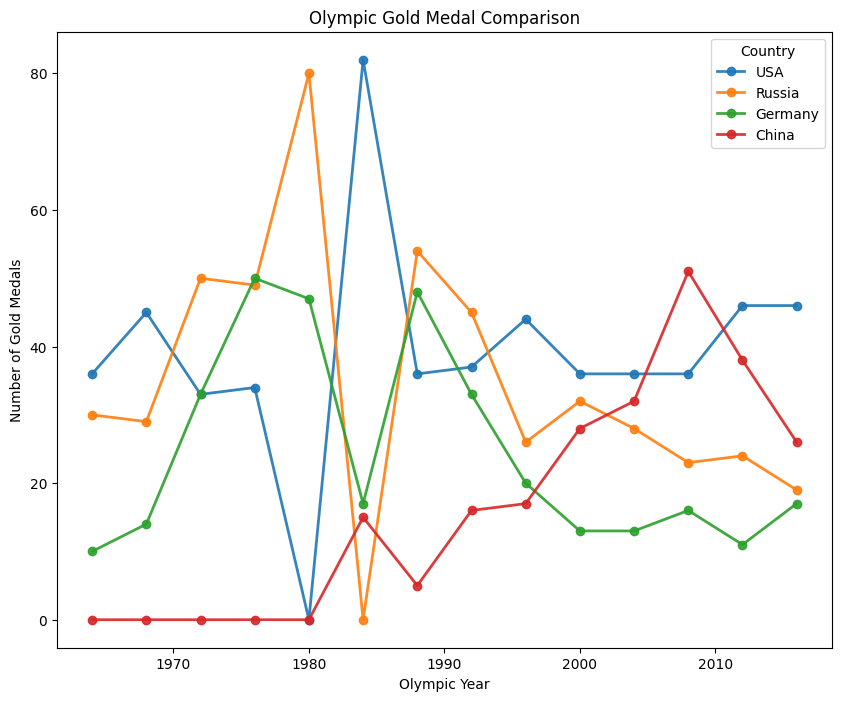

In [418]:
gold_1960 = medals_tally_1960[medals_tally_1960["Medal"] == "Gold"]
gold_country_1960 = gold_1960.groupby(["Country"])["Medal_corrected"].sum()
year_gold_1960 = gold_1960.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)
year_gold_1960 = year_gold_1960.loc[:, top_4]

year_gold_1960.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Gold Medals')
plt.title('Olympic Gold Medal Comparison');

In [419]:
year_team_gdp = olympics_complete_subset.loc[:, ['Year', 'Country', 'GDP']].drop_duplicates()

In [420]:
year_team_gdp

,Year,Country,GDP
0,1992,China,4.269160e+11
1,2012,China,8.560550e+12
2,2000,Finland,1.255400e+11
3,1996,Finland,1.320990e+11
6,2008,Norway,4.625540e+11
...,...,...,...
138416,2000,Cook Islands,NaN
139376,2004,Liberia,4.747000e+08
140002,2016,Tuvalu,3.421888e+07
141038,1964,Dominican Republic,1.025600e+09


In [421]:
medal_tally_gdp = medals_tally_1960.merge(year_team_gdp,
                                   left_on = ['Year', 'Country'],
                                   right_on = ['Year', 'Country'],
                                   how = 'left')

In [422]:
medal_tally_gdp

,Year,Country,Sport,Event,Medal,atletas,Team_Event,Medal_corrected,GDP
0,1964,Argentina,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Silver,1,0,1,2.560525e+10
1,1964,Australia,Athletics,"Athletics Men's 10,000 metres",Bronze,1,0,1,2.378766e+10
2,1964,Australia,Athletics,Athletics Women's 200 metres,Bronze,1,0,1,2.378766e+10
3,1964,Australia,Athletics,Athletics Women's 400 metres,Bronze,1,0,1,2.378766e+10
4,1964,Australia,Athletics,Athletics Women's 400 metres,Gold,1,0,1,2.378766e+10
...,...,...,...,...,...,...,...,...,...
10688,2016,Venezuela,Athletics,Athletics Women's Triple Jump,Silver,1,0,1,NaN
10689,2016,Venezuela,Boxing,Boxing Men's Flyweight,Bronze,1,0,1,NaN
10690,2016,Venezuela,Cycling,Cycling Women's BMX,Bronze,1,0,1,NaN
10691,2016,Vietnam,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,1,0,1,2.052760e+11


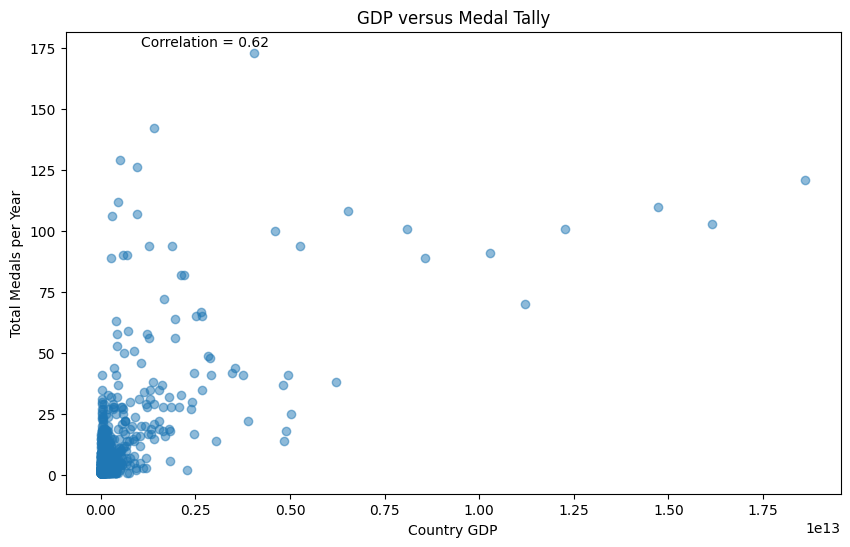

In [423]:

# Agrupar para sumar las medallas por cada combinación de Año y País
grouped_data = medal_tally_gdp.groupby(['Year', 'Country']).agg({'Medal_corrected': 'sum','GDP': 'first'  # El GDP es el mismo para el mismo país/año
}).reset_index()

# Calcular la correlación sobre los datos ya agrupados
correlation = grouped_data[['GDP', 'Medal_corrected']].corr().iloc[0, 1]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['GDP'], 
         grouped_data['Medal_corrected'], 
         linestyle='none', 
         marker='o',
         alpha=0.5)

plt.xlabel('Country GDP')
plt.ylabel('Total Medals per Year')
plt.title('GDP versus Medal Tally')

# Ajustar la posición del texto según los nuevos totales
plt.text(grouped_data['GDP'].quantile(0.9), 
         grouped_data['Medal_corrected'].max() * 0.9,
         f"Correlation = {correlation:.2f}")

plt.show()

In [424]:
olympics_complete_subset[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
74,1964,Tokyo
11,1968,Mexico City
12,1972,Munich
37,1976,Montreal
70,1980,Moskva
10,1984,Los Angeles
13,1988,Seoul
0,1992,Barcelona
3,1996,Atlanta
2,2000,Sydney


In [425]:
olympics_complete_subset["City"].replace(["Athina","Moskva"],["Athens", "Moscow"], inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20484\2402695532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics_complete_subset["City"].replace(["Athina","Moskva"],["Athens", "Moscow"], inplace = True)


In [426]:
olympics_complete_subset

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,...,Event,Medal,Country,Has_Medal,Team_Event,Single_Event,Event_Category,Country Code,GDP,Population
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,...,Basketball Men's Basketball,NoM,China,0,0,0,0,CHN,4.269160e+11,1.164970e+09
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,...,Judo Men's Extra-Lightweight,NoM,China,0,0,0,0,CHN,8.560550e+12,1.350695e+09
2,7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,...,Badminton Men's Singles,NoM,Finland,0,0,0,0,FIN,1.255400e+11,5.176209e+06
3,8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,...,Sailing Women's Windsurfer,NoM,Finland,0,0,0,0,FIN,1.320990e+11,5.124573e+06
4,9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,...,Sailing Women's Windsurfer,NoM,Finland,0,0,0,0,FIN,1.255400e+11,5.176209e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158143,222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,...,Hockey Men's Hockey,NoM,Argentina,0,0,0,0,ARG,1.646580e+11,3.872870e+07
158144,222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,...,Football Men's Football,NoM,USA,0,0,0,0,USA,1.282450e+12,2.098960e+08
158145,222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,...,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,0,0,0,RUS,2.597080e+11,1.465966e+08
158146,222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,...,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,0,0,0,RUS,5.910170e+11,1.440671e+08


In [427]:
city_to_country = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}

# Map cities to countries
olympics_complete_subset['Country_Host'] = olympics_complete_subset['City'].map(city_to_country)

#print the 
olympics_complete_subset.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

,Year,Country_Host
74,1964,Japan
11,1968,Mexico
12,1972,Germany
37,1976,Canada
70,1980,Russia
10,1984,USA
13,1988,South Korea
0,1992,Spain
3,1996,USA
2,2000,Australia


In [430]:
# Extract year, host nation and team name from the data
year_host_team = olympics_complete_subset[['Year', 'Country_Host', 'Country']].drop_duplicates()

# check rows where host country is the same as team
row_mask_4 = (year_host_team['Country_Host'] == year_host_team['Country'])

# add years in the year_host_team to capture one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

# Subset only where host nation and team were the same
year_host_team = year_host_team[row_mask_4]

# Calculate the medals won in each year where a team played at home. merge year_host_team with medal_tally on year and team
year_host_team_medal = year_host_team.merge(medals_tally_1960,
                                           left_on = ['Year', 'Country'],
                                           right_on = ['Year', 'Country'],
                                           how = 'left')

year_host_team_medal.rename(columns = {'Medal_corrected' : 'Medal_Won_Host_Year'}, inplace = True)

# Calculate medals won by team in previous year
year_host_team_medal = year_host_team_medal.merge(medals_tally_1960,
                                                 left_on = ['Prev_Year', 'Country'],
                                                 right_on = ['Year', 'Country'],
                                                 how = 'left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Medal_corrected': 'Medal_Won_Prev_Year',
                                      'Year_x':'Year'}, inplace = True)

# Calculate the medals won by the team the year after they hosted.
year_host_team_medal = year_host_team_medal.merge(medals_tally_1960,
                                                 left_on = ['Next_Year', 'Country'],
                                                 right_on = ['Year', 'Country'],
                                                 how = 'left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Year_x': 'Year',
                                      'Medal_corrected' : 'Medal_Won_Next_Year'}, inplace = True)

# General formatting changes
year_host_team_medal.drop(['Prev_Year', 'Next_Year'], axis = 1, inplace = True)
year_host_team_medal.sort_values('Year', ascending = True, inplace = True)
year_host_team_medal.reset_index(inplace = True, drop = True)

# column re-ordering
year_host_team_medal = year_host_team_medal.loc[:, ['Year', 'Country_Host', 'Country', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

year_host_team_medal

,Year,Country_Host,Country,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1964,Japan,Japan,NaN,1,1.0
1,1964,Japan,Japan,NaN,1,1.0
2,1964,Japan,Japan,NaN,1,1.0
3,1964,Japan,Japan,NaN,1,1.0
4,1964,Japan,Japan,NaN,1,1.0
...,...,...,...,...,...,...
2649170,2016,Brazil,Brazil,1.0,1,NaN
2649171,2016,Brazil,Brazil,1.0,1,NaN
2649172,2016,Brazil,Brazil,1.0,1,NaN
2649173,2016,Brazil,Brazil,1.0,1,NaN
